<a href="https://colab.research.google.com/github/ldk7024/Deep_Learning_Study/blob/main/21_07_14_%ED%8C%A8%EC%85%98_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 패션 이미지 데이터 (10가지)를 분류하는 모델을 만들어보자!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [3]:
data = fashion_mnist.load_data()
data

4423680/4422102 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
X_train = data[0][0]  # X_train
y_train = data[0][1]  # y_train
X_test = data[1][0]  # X_test
y_test = data[1][1]  # y_test

In [5]:
print(X_train.shape)  # 데이터 개수, 가로 픽셀수, 세로 픽셀수
print(y_train.shape)
print(X_test.shape)   # 데이터 개수, 가로 픽셀수, 세로 픽셀수
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


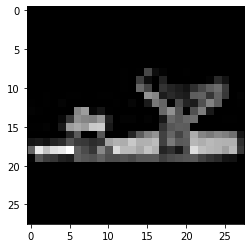

In [6]:
plt.imshow(X_train[59999], cmap ='gray')
# imshow: 이미지 데이터를 그림으로 출력해주는 명령
plt.show()

In [7]:
print(X_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


### 직접 처음부터 모든 단계를 설정해보자!

In [8]:
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

In [9]:
y_train_one_hot.shape

(60000, 10)

In [11]:
# -1은 60000을 제외한 나머지 값들을 다 곱해서 일렬로 퍼줌
# X_train = X_train.reshape(60000, -1)
# X_test = X_test.reshape(10000, -1)

In [12]:
# X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [42]:
# train_test_split : 무조건 train, test 셋만 나눠주는게 아니라 데이터를 일정 비율로 랜덤하게 나누어주는 명령
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_val, y_train_one_hot, y_val_one_hot = train_test_split(X_train, 
                                                                  y_train_one_hot,
                                                                  random_state = 3
                                                                  )

In [44]:
# 딥러닝을 위한 라이브러리를 임포트
from tensorflow.keras import Sequential  # 신경망의 뼈대를 구성
from tensorflow.keras.layers import Dense   # 신경망의 층을 구성
from tensorflow.keras.layers import Flatten # Flatten: 데이터를 1차원으로 자동으로 펴주는 모듈
from tensorflow.keras.layers import InputLayer,Dense

In [45]:
# 신경망의 뼈대를 설정
model = Sequential()

# Flatten 명령을 통해서 한번에 바로 2차원 이미지 데이터를 1차원으로 펴줌
model.add (Flatten(input_shape = (28,28)))
# 입력층 + 중간층
# input_dim : 데이터 특성의 개수
# activation: 활성화 함수를 설정 (들어온 자극 (데이터)에 대한 응답여부를 결정하는 함수)
model.add(Dense(500, activation="sigmoid"))

# 중간층
model.add(Dense(500,activation="sigmoid"))   # 하나의 층
model.add(Dense(300, activation="sigmoid"))   # 하나의 층
model.add(Dense(100, activation="sigmoid"))   # 하나의 층


# 출력층
model.add(Dense(10, activation="softmax"))   # 0~9까지의 정답레이블 (10개)

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_15 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_16 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_17 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1010      
Total params: 824,410
Trainable params: 824,410
Non-trainable params: 0
________________________________________________

In [46]:
# 2. 학습/ 평가 방법 설정
model.compile(loss ="categorical_crossentropy",
               optimizer = 'Adam',            # Adam : 최근에 가장 많이 사용되는 성능이 높은 최적화 함수
               metrics = ["acc"]               # metrics: 평가 방법을 설정 (분류 문제이기 때문에 정확도(acc)를 확인)
               )

In [48]:
h = model.fit(X_train, 
              y_train_one_hot,
              validation_data = (X_val, y_val_one_hot), 
              epochs=30, 
              verbose =1)
# verbose: 학습 결과의 출력 형태를 설정하는 명령 (0: 출력 x, 1: bar 형태 (디폴트 값), 2: bar가 없는 형태로 출력)

Epoch 1/30
1407/1407 [==============================] - 6s 5ms/step - loss: 0.8365 - acc: 0.6749 - val_loss: 0.8001 - val_acc: 0.6641
Epoch 2/30
1407/1407 [==============================] - 6s 5ms/step - loss: 0.7928 - acc: 0.6844 - val_loss: 0.7811 - val_acc: 0.7003
Epoch 3/30
1407/1407 [==============================] - 6s 4ms/step - loss: 0.7680 - acc: 0.6968 - val_loss: 0.7353 - val_acc: 0.7143
Epoch 4/30
1407/1407 [==============================] - 6s 4ms/step - loss: 0.7615 - acc: 0.6972 - val_loss: 0.7303 - val_acc: 0.7269
Epoch 5/30
1407/1407 [==============================] - 6s 4ms/step - loss: 0.7379 - acc: 0.7097 - val_loss: 0.6966 - val_acc: 0.7399
Epoch 6/30
1407/1407 [==============================] - 6s 5ms/step - loss: 0.6971 - acc: 0.7273 - val_loss: 0.7443 - val_acc: 0.7109
Epoch 7/30
1407/1407 [==============================] - 6s 4ms/step - loss: 0.6977 - acc: 0.7283 - val_loss: 0.6510 - val_acc: 0.7473
Epoch 8/30
1407/1407 [==============================] - 6s 4ms

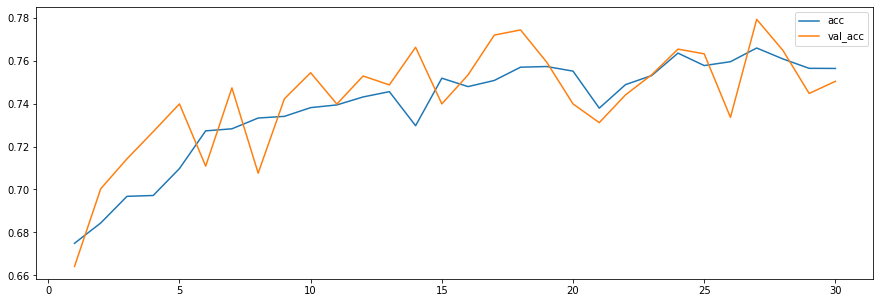

In [51]:
# 시각화

plt.figure(figsize=(15,5))

# train 데이터
plt.plot(range(1,31),
         h.history['acc'],
         label ='acc'
         )
# val 데이터
plt.plot(range(1,31),
         h.history['val_acc'],
         label ='val_acc'
         )



plt.legend()
plt.show()

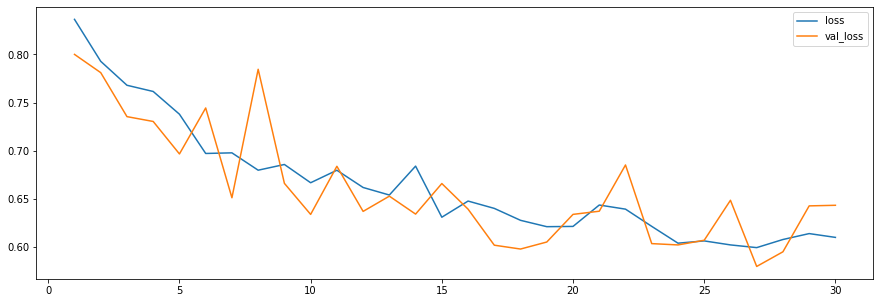

In [52]:
# loss 시각화

plt.figure(figsize=(15,5))

# train 데이터
plt.plot(range(1,31),
         h.history['loss'],
         label ='loss'
         )

# val 데이터
plt.plot(range(1,31),
         h.history['val_loss'],
         label ='val_loss'
         )



plt.legend()
plt.show()

In [53]:
# 모델 평가
model.evaluate(X_test,y_test_one_hot)

313/313 [==============================] - 1s 3ms/step - loss: 0.6612 - acc: 0.7484


[0.6611799597740173, 0.7483999729156494]